# Affective signals - I
----
<span style="color:Blue">**Through this notebook, we hope you get a hands-on approach to the explore different modalities that are used in multimodal analysis of human behaviour. 
    Below you will find code snippets and theory that will help you apply the libraries that will be introduced in the lecture.**</span>

----


In [1]:
import numpy as np
import pandas as pd

import subprocess
import time
import os

import matplotlib.pyplot as plt 

import re
import seaborn as sns
import cv2

## Facial Expression
----
We tend to use facial expressions to communicate with each other and also express our emotional state. A facial expression is one or more motions or positions of the muscles beneath the skin of the face. These movements are believed to convey the emotional state of an individual to observers. Thus, facial expressions are one form of nonverbal communication.[source](https://en.wikipedia.org/wiki/Facial_expression)

----

### [OpenFace](https://github.com/TadasBaltrusaitis/OpenFace/wiki)

----
During the initial set up you should have already processed your videos using OpenFace. If you have not yet done so please refere to the [Readme]( https://github.com/mbp-lab/sose22_mbp_affective_signals/blob/master/README.md)(Extracting features using openface)

----
OpenFace creates a csv file that contains all features that have been extracted from the video. It should be present in the /Notebooks/processed/.
During the notebook you will use this generated csv to analyse your features.

A more detailed description of the features that are extracted can be found [here](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Output-Format)

In [2]:
#load the csv file using pandas
#change the path accordingly also remember that you are working within the container. 
#The path will ideally be /home/notebook/processed/<name-of-your-video>.csv
df = pd.read_csv("processed/Self_Intro.csv")

In [3]:
df

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.000,0.98,1,0.302922,0.368862,-0.878737,-0.225829,0.377301,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,0,0.017,0.98,1,0.372949,0.391862,-0.841043,-0.225918,0.397244,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,0,0.033,0.98,1,0.372732,0.388746,-0.842584,-0.229594,0.387932,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,0,0.050,0.98,1,0.381301,0.364032,-0.849759,-0.222712,0.388537,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,0,0.067,0.98,1,0.378195,0.359295,-0.853156,-0.219650,0.368747,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20586,20587,0,343.100,0.98,1,0.570226,0.271313,-0.775391,-0.282047,0.303798,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20587,20588,0,343.117,0.93,1,0.589491,0.280090,-0.757661,-0.274419,0.303707,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20588,20589,0,343.133,0.98,1,0.540308,0.307743,-0.783174,-0.215604,0.384889,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
20589,20590,0,343.150,0.98,1,0.576318,0.317396,-0.753072,-0.226983,0.373727,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [4]:
#First 5 rows of the dataframe(csv file)
df.head()

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,...,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.000,0.98,1,0.302922,0.368862,-0.878737,-0.225829,0.377301,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2,0,0.017,0.98,1,0.372949,0.391862,-0.841043,-0.225918,0.397244,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,0,0.033,0.98,1,0.372732,0.388746,-0.842584,-0.229594,0.387932,...,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4,0,0.050,0.98,1,0.381301,0.364032,-0.849759,-0.222712,0.388537,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,5,0,0.067,0.98,1,0.378195,0.359295,-0.853156,-0.219650,0.368747,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#### Action Units

Facial Action Coding System (FACS) is a system to taxonomize human facial movements by their appearance on the face. Movements of individual facial muscles are encoded by FACS from slight different instant changes in facial appearance. Using FACS it is possible to code nearly any anatomically possible facial expression, deconstructing it into the specific Action Units (AU) that produced the expression. It is a common standard to objectively describe facial expressions[[1]](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Action-Units)

A List of all the Action units can be found [here](https://www.cs.cmu.edu/~face/facs.htm). You can find small animation of the action units here [here](https://imotions.com/blog/facial-action-coding-system/)


AUs can be described in two ways within the csv file 

    Presence - if AU is visible in the face (for example AU01_c)
    Intensity - how intense is the AU (minimal to maximal) on a 5 point scale ( for example AU01_r)

OpenFace provides both of these scores. For presence of AU 1 the column AU01_c in the output file would encode 0 as not present and 1 as present. For intensity of AU 1 the column AU01_r in the output file would range from 0 (not present), 1 (present at minimum intensity), 5 (present at maximum intensity), with continuous values in between.[source](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Action-Units)

---
Let's look at the intensity plots of all the action units.

List of AU columns: Index(['AU01_r', 'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r',
       'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r',
       'AU25_r', 'AU26_r', 'AU45_r'],
      dtype='object')


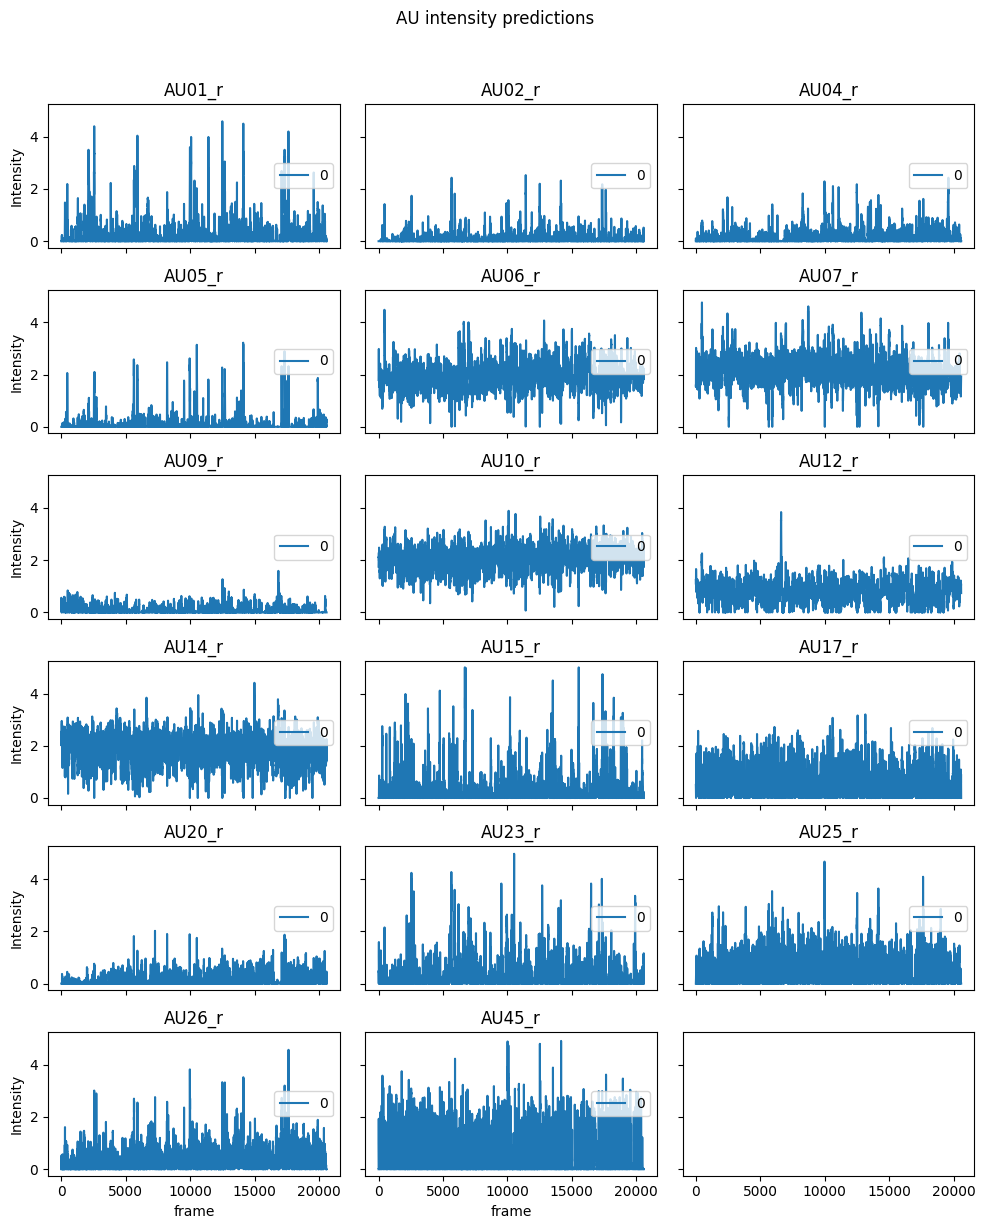

In [5]:
#code adapted from https://towardsdatascience.com/how-to-extract-facial-expressions-head-pose-and-gaze-from-any-youtube-video-2aa6590c2bb6
# Threshold data by 80%
df_clean = df[df.confidence>=.80]
# Plot all Action Unit time series. 
au_regex_pat = re.compile(r'^AU[0-9]+_r$')
au_columns_r = df_clean.columns[df_clean.columns.str.contains(au_regex_pat)]
print("List of AU columns:", au_columns_r)
f,axes = plt.subplots(6, 3, figsize=(10,12), sharex=True, sharey=True)
axes = axes.flatten()
for au_ix, au_col in enumerate(au_columns_r):
    sns.lineplot(x='frame', y=au_col, hue='face_id', data=df_clean, ax=axes[au_ix])
    axes[au_ix].set(title=au_col, ylabel='Intensity')
    axes[au_ix].legend(loc=5)
plt.suptitle("AU intensity predictions", y=1.02)
plt.tight_layout()

List of AU columns: Index(['AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c',
       'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c',
       'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c'],
      dtype='object')


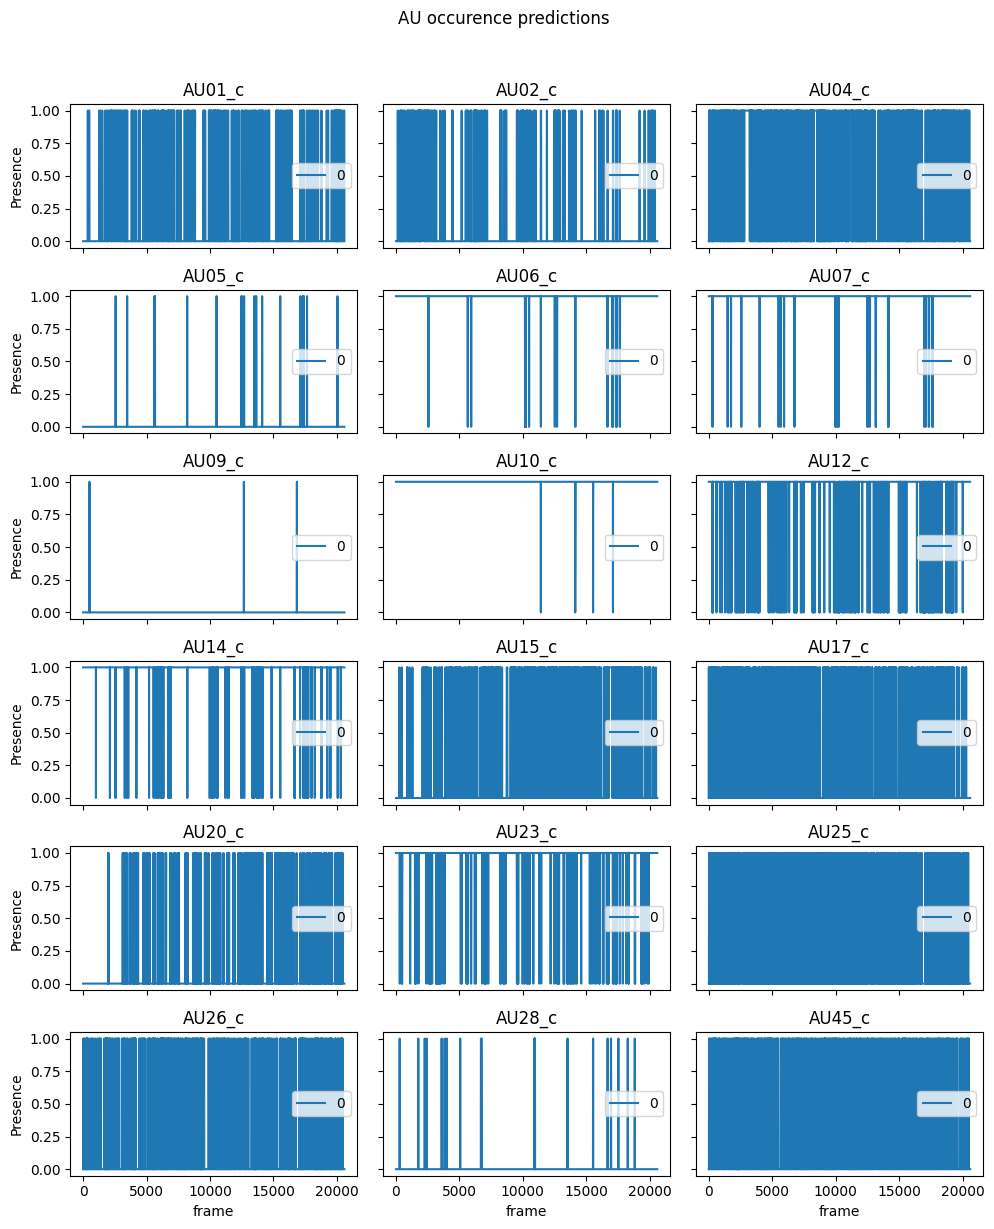

In [6]:
au_regex_pat = re.compile(r'^AU[0-9]+_c$')
au_columns = df_clean.columns[df_clean.columns.str.contains(au_regex_pat)]
print("List of AU columns:", au_columns)
f,axes = plt.subplots(6, 3, figsize=(10,12), sharex=True, sharey=True)
axes = axes.flatten()
for au_ix, au_col in enumerate(au_columns):
    sns.lineplot(x='frame', y=au_col, hue='face_id', data=df_clean, ax=axes[au_ix])
    axes[au_ix].set(title=au_col, ylabel="Presence")
    axes[au_ix].legend(loc=5)
plt.suptitle("AU occurence predictions", y=1.02)
plt.tight_layout()

----
We know that AU24 corresponds to a lip pressor.

![AU24.gif](AU24.gif)

[source](https://imotions.com/blog/facial-action-coding-system/)


Let's try to find out how many times you press your lips in the own video based on the AU24_c. Use the dataframe that we initialized above for this! 

#### Task 1.1: Count the number of times the action unit AU24 is present in your video

In [7]:
au_columns

Index(['AU01_c', 'AU02_c', 'AU04_c', 'AU05_c', 'AU06_c', 'AU07_c', 'AU09_c',
       'AU10_c', 'AU12_c', 'AU14_c', 'AU15_c', 'AU17_c', 'AU20_c', 'AU23_c',
       'AU25_c', 'AU26_c', 'AU28_c', 'AU45_c'],
      dtype='object')

In [8]:
###############################
#     your code goes here     #
###############################

#hint: use the dataframe to count the number of times AU24 occurs

##My feature-exctacted csv file does not have the column AU24 at all :), may be because I was really camera conscious and shy while it was being recorded
#So I have looked at AU23 which is similar action unit which is encoded as Lip part according to FACS   
n_23 = df_clean[(df_clean['AU23_c'] == 1)]
print("There are", len(n_23) ,"instances where AU23_c is present.")


There are 19232 instances where AU23_c is present.


AU12 and AU6 correspond to happiness, so let's see how many times do they co-occur in your video:

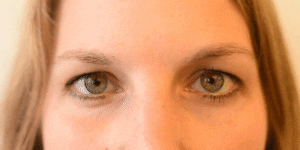
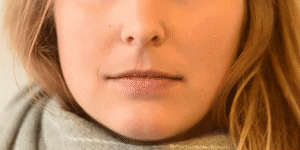

[source](https://imotions.com/blog/facial-action-coding-system/)

----

#### Task 1.2: Count the number of times the action units 12 and 6 are present simultaneously in your video


In [9]:
###############################
#     your code goes here     #
###############################


#(hint: try to look at the columns AU12_c and AU06_c):

n_12_6 = df_clean[(df_clean['AU12_c'] == 1) & (df_clean['AU06_c'] == 1)]
print("There are", len(n_12_6) ,"instances where Action Units 12 and 6 are simultaneously present in the video")

There are 17503 instances where Action Units 12 and 6 are simultaneously present in the video



#### Task 1.3: Visualize the correlation of all the Action Units that are present based on their intensity

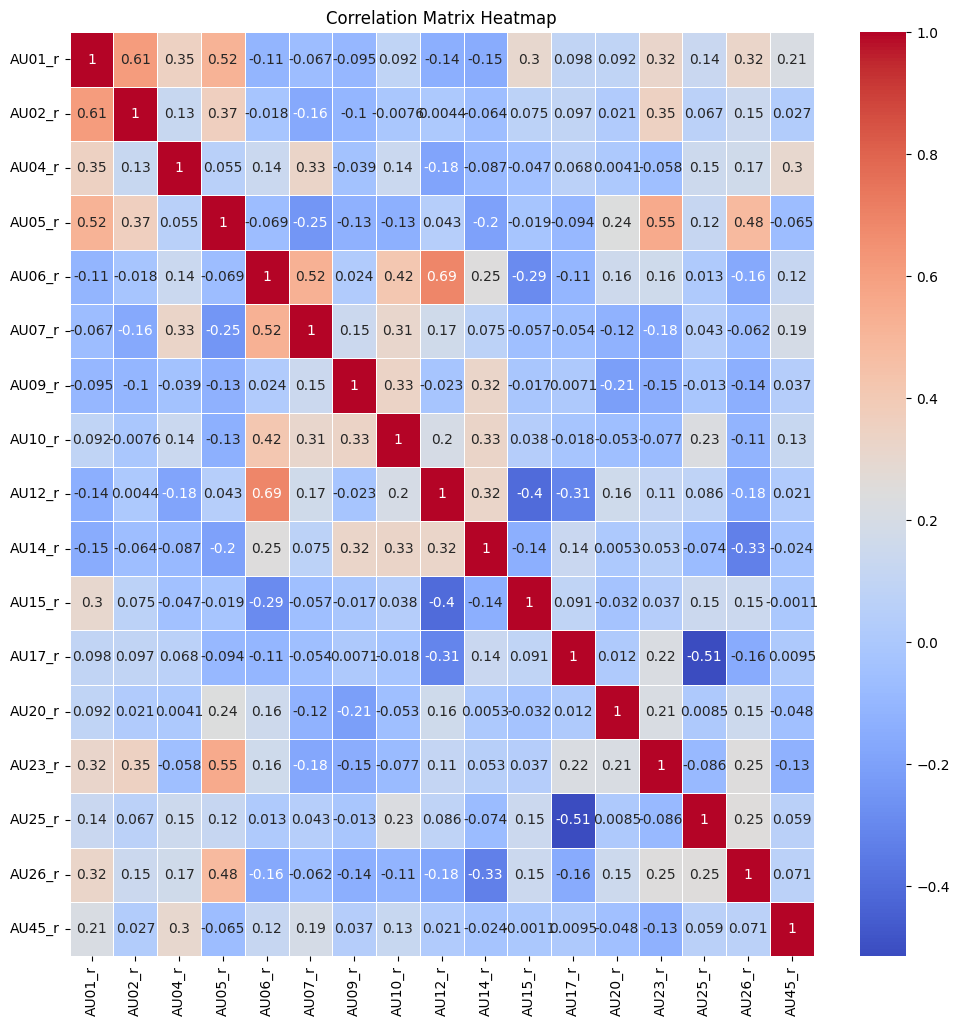

In [10]:
###############################
#     your code goes here     #
###############################

#hint: try to use AU_columns_r variables to get the required columns and find the correlation matrix from the dataframe):

au_r = df_clean[au_columns_r]
cm_au_r = au_r.corr()
#print(cm_au_r)

# Plot the correlation using a heatmap 
# Hint: try using sns.heatmap(...)

plt.figure(figsize=(12, 12))  
sns.heatmap(cm_au_r, annot=True, cmap='coolwarm', linewidths=0.5)
plt.yticks(rotation=0)
plt.title('Correlation Matrix Heatmap')
plt.show()



-----
#### Task 1.4: Calculate the mean and variance for each of the Action Unit intensities

In [11]:
###############################
#     your code goes here     #
###############################

au_rMean, au_rVar = au_r.mean(axis=0), au_r.var(axis=0)
print(f"Mean:\n{au_rMean}\n\nVariance:\n{au_rVar}")

Mean:
AU01_r    0.223271
AU02_r    0.072044
AU04_r    0.139721
AU05_r    0.078204
AU06_r    1.900808
AU07_r    2.082334
AU09_r    0.068873
AU10_r    2.068349
AU12_r    0.776874
AU14_r    1.879358
AU15_r    0.264649
AU17_r    0.559397
AU20_r    0.110050
AU23_r    0.250314
AU25_r    0.505302
AU26_r    0.362852
AU45_r    0.414501
dtype: float64

Variance:
AU01_r    0.229455
AU02_r    0.038253
AU04_r    0.074831
AU05_r    0.077797
AU06_r    0.268265
AU07_r    0.265222
AU09_r    0.020692
AU10_r    0.167219
AU12_r    0.178197
AU14_r    0.261495
AU15_r    0.288049
AU17_r    0.264218
AU20_r    0.037482
AU23_r    0.279719
AU25_r    0.277161
AU26_r    0.174809
AU45_r    0.563783
dtype: float64


#### Task 1.5:  Verify the action units that are found using openface.

You can find a visual guide to all the action units [here](https://www.cs.cmu.edu/~face/facs.htm) and [here](https://imotions.com/blog/facial-action-coding-system/)

OpenFace is able to recognize a subset of AUs, specifically: 1, 2, 4, 5, 6, 7, 9, 10, 12, 14, 15, 17, 20, 23, 25, 26, 28, and 45.

In the following cells, you can use the interactive slider to scroll through your video and find a frame that you find has multiple action units present. 

Once you have found such a frame you can select "True" in the save drop down widget.This will save the current frame as /home/Notebooks/processed/frame<font color="red">%frame_number%</font>.jpg. (This is still within the docker container, but you should also have a copy present on your local system)

In [12]:
import cv2
from IPython.display import Image
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display

# update the video path here accordingly, please be aware you are working within a docker container so the proccesed 
# folder will be present in /home/Notebooks/processed/ 
videoPath = "Self_Intro.mp4"

@interact(frame=(min(df_clean.frame),max(df_clean.frame)),videoPath=videoPath, save=[False,True])
def disp_frame(frame, videoPath, save):
    '''Display a frame that is controlled by the slider and also save a frame by selecting True from the dropdown'''
    vidcap = cv2.VideoCapture(videoPath)
    success, image = vidcap.read()
    if not success:
        print("Path to video might be wrong!")
    while success:
        frameId = int(round(vidcap.get(1))) #current frame number, rounded b/c sometimes you get frame intervals which aren't integers...this adds a little imprecision but is likely good enough
        success, image = vidcap.read()
        if frameId == frame:
            img1 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(img1) 
            plt.axis("off")
            if save:
                cv2.imwrite("processed/frame%d.jpg" % frameId, image)
    vidcap.release()
    print("Complete")

interactive(children=(IntSlider(value=10296, description='frame', max=20591, min=1), Text(value='Self_Intro.mp…

Now that you have a image that you want to analyze, try to refer the visual guides mentioned above to find what action units are present in your image. 

In the next cell you will try to find out what action units that were extracted using openface. 

In [13]:
# use the dataframe you loaded to find the corresponding frame and extract all the action units


####################################
#    Your code goes here           #
####################################

frame_df = df_clean[df_clean['frame'] == 10462]
frame_au_c = frame_df[au_columns]
frame_au_c

,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
10461,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


#### Write a short note on what you observe: 

* Are the Facial action units classified accurately, which action unit can you observe that is not extracted by openface
  * Answer : Openface correctly identifies the Action units 4(Brow Lowerer), 6(Cheek Raiser), 7(Lid Tightener - Orbicularis oculi, pars palpebralis), 10(Upper Lip Raiser), 12(Lip Corner Puller), 14(Dimpler), 23(Lip Tightener - Orbicularis oris) and 25(Lips part).
    But in actual image I can not identify AU 10 and AU 12 but instead there is AU 18(Lip Puckerer) present.
#### Bonus Task
* You can try to not just look at the presence but also the intensities of the action units and describe what you observe.
  * Answer : The expression in frame 10462 shows strong activation in the cheek (AU06) and eyelid muscles (AU07), indicating a possible smile or positive emotion. There's moderate movement in the lips (AU10, AU12, AU14), contributing to the expression, and slight parting of the lips (AU25). Other action units show minimal or no activation, suggesting a focused expression around the mouth and eyes.

Your analysis goes here: 

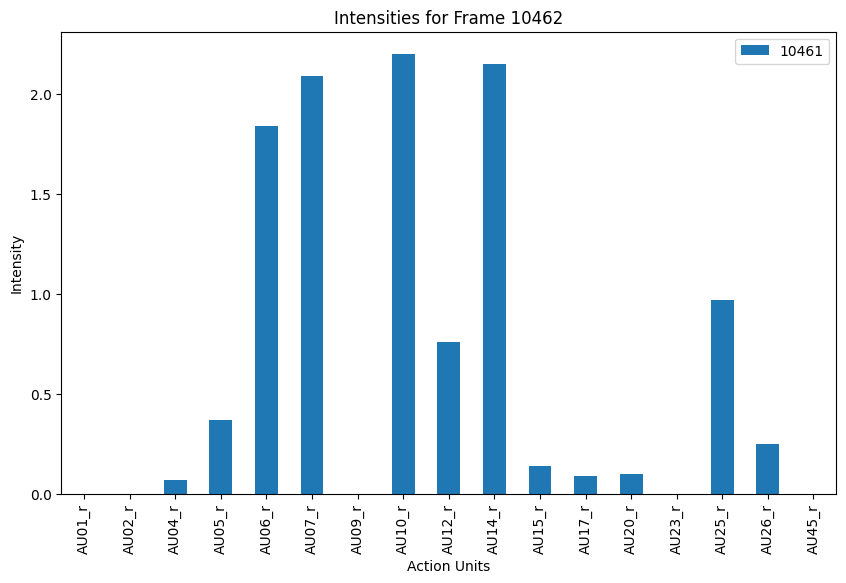

In [14]:
##########################
#  your code goes here   #
##########################

frame_au_r = frame_df[au_columns_r]
frame_au_r
frame_au_r.T.plot(kind='bar', figsize=(10, 6))
plt.title('Intensities for Frame 10462')
plt.xlabel('Action Units')
plt.ylabel('Intensity')
plt.show()

#### Task 1.6 Histogram of oriented gradients

In [21]:
pip install scikit-image

  Using cached lazy_loader-0.4-py3-none-any.whl.metadata (7.6 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 8.7 MB/s eta 0:00:00a 0:00:01
Using cached lazy_loader-0.4-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


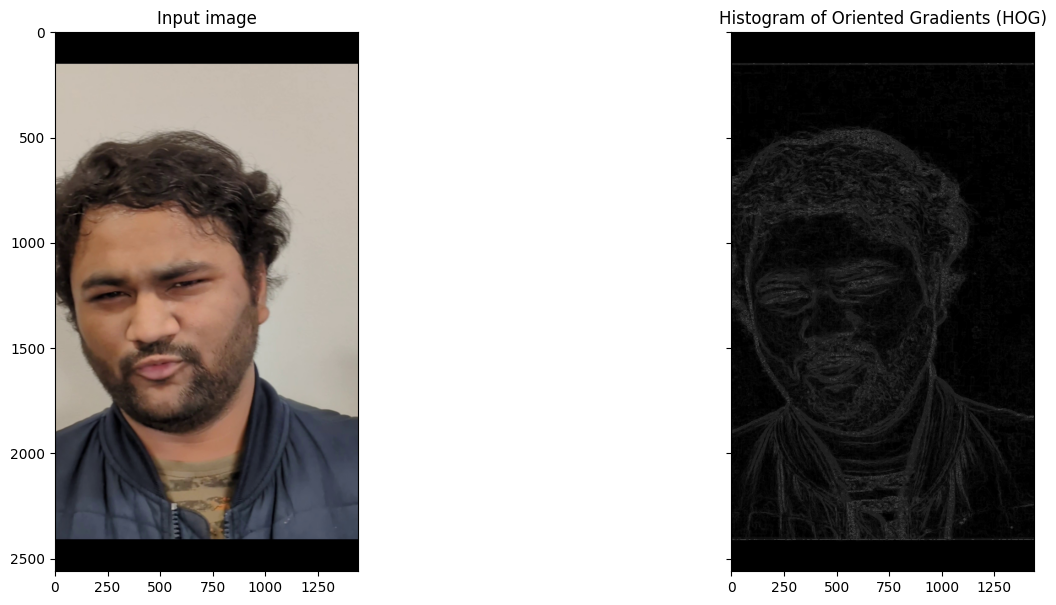

In [46]:
from skimage.feature import hog
from skimage import io, data, feature, exposure, color 
from skimage.io import imread, imshow
from skimage.transform import resize



#load the image, change the path accordingly to match the frame that you have saved 
image_path = "processed/frame10462.jpg"
img = io.imread(image_path)
#plt.imshow(img)
#plt.show()

###############################
#     your code goes here     #
###############################
# You can extract the hog features using skimage.feature.hog
# or you can code the extractor manually . Heres a guide to help you do it(https://learnopencv.com/histogram-of-oriented-gradients/)

#resized_img = resize(img, (100,150)) 
#imshow(resized_img) 
#print(resized_img.shape)

#creating hog features 
fd, hog_img = hog(img, orientations=16, pixels_per_cell=(4, 4), 
                    cells_per_block=(2, 2), visualize=True, channel_axis=-1)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7), sharex=True, sharey=True) 
ax1.imshow(img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

#Rescaled histogram for better display 
hog_rescaled = exposure.rescale_intensity(hog_img, in_range=(0, 5)) 

ax2.imshow(hog_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients (HOG)')
plt.show()

#### Task 1.7 Can you think of other features that you could extract from your image:

In [47]:
###############################
#     your code goes here     #
###############################




#### Bonus Task: Add the facial landmark on to the image.
* you can find the facial landmarks locations within the dataframe
* x_0, x_1, ... x_66, x_67, y_0,...y_67 location of 2D landmarks in pixels, the landmark index can be seen below

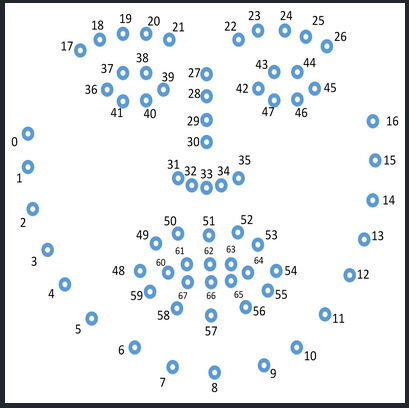

[source](https://github.com/TadasBaltrusaitis/OpenFace/wiki/Output-Format)

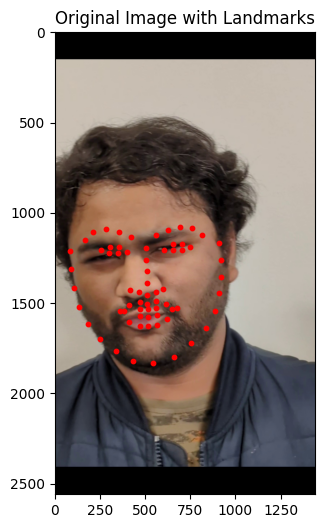

In [48]:
###############################
#     your code goes here     #
###############################




#Landmark points given df
def extract_landmarks(df):
    #x and y coordinates
    x_coords = [df[f'x_{i}'].values[0] for i in range(68)]
    y_coords = [df[f'y_{i}'].values[0] for i in range(68)]
    
    #x and y coordinates into a single array
    landmarks = np.array(list(zip(x_coords, y_coords)))
    return landmarks


def results(image, landmarks):
    plt.figure(figsize=(12, 6))
    
    #Original Image with Landmarks
    plt.title('Original Image with Landmarks')
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], c='red', s=10) 
    plt.show()

landmarks = extract_landmarks(frame_df)
results(img, landmarks)

If you are interested, try out additional analyses and visualizations to explore your individual facial expressions in the video. For example, try to find out how much you're smiling in your video. We can discuss your findings and ideas in the upcoming tutorial !

#### References:

    OpenFace 2.0: Facial Behavior Analysis Toolkit Tadas Baltrušaitis, Amir Zadeh, Yao Chong Lim, and Louis-Philippe Morency, IEEE International Conference on Automatic Face and Gesture Recognition, 2018

    Facial landmark detection and tracking

    Convolutional experts constrained local model for facial landmark detection A. Zadeh, T. Baltrušaitis, and Louis-Philippe Morency. Computer Vision and Pattern Recognition Workshops, 2017

    Constrained Local Neural Fields for robust facial landmark detection in the wild Tadas Baltrušaitis, Peter Robinson, and Louis-Philippe Morency. in IEEE Int. Conference on Computer Vision Workshops, 300 Faces in-the-Wild Challenge, 2013.
    Eye gaze tracking

    Rendering of Eyes for Eye-Shape Registration and Gaze Estimation Erroll Wood, Tadas Baltrušaitis, Xucong Zhang, Yusuke Sugano, Peter Robinson, and Andreas Bulling in IEEE International. Conference on Computer Vision (ICCV), 2015

    Facial Action Unit detection

    Cross-dataset learning and person-specific normalisation for automatic Action Unit detection Tadas Baltrušaitis, Marwa Mahmoud, and Peter Robinson in Facial Expression Recognition and Analysis Challenge, IEEE International Conference on Automatic Face and Gesture Recognition, 2015